# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as pltstyle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
import matplotlib.patheffects as pe
import matplotlib.lines as mlines
import locale
from datetime import date
import warnings

# Configs globais

In [ ]:
warnings.filterwarnings('ignore')

fontconfig = dict(weight='bold')
padding = 20

## Leitura dos dataframes

In [ ]:
df_espumante = pd.read_csv('/content/ExpEspumantes.csv', sep=';')
df_suco = pd.read_csv('/content/ExpSuco.csv', sep=';')
df_uva = pd.read_csv('/content/ExpUva.csv', sep=';')
df_vinho = pd.read_csv('/content/ExpVinho.csv', sep=';')

display(df_espumante.head())
display(df_suco.head())
display(df_uva.head())
display(df_vinho.head())

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Alemanha,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
1,2,Angola,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
2,3,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
3,4,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Argentina,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34344,49753
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,96,91,12,24,86,44,13,4,5,24
2,3,Angola,0,0,0,0,0,0,0,0,...,1895,1553,0,0,17766,21627,6073,5915,86536,91839
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,48,53,95,99,36,25,120,168,48,57
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,8,30,44,152,0,0,0,0
1,2,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,...,2870420,5833592,1863097,3480290,1371694,2791556,1461590,2569452,559012,1213303
2,3,Angola,0,0,0,0,0,0,0,0,...,15,33,75,145,0,0,0,0,0,0
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,65,164,190,580,304,1013,437,1349,253,999
4,5,Arabia Saudita,0,0,0,0,0,0,0,0,...,14725,28615,167731,271231,32325,95999,2818,14671,12224,53675


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploração inicial

In [ ]:
df_espumante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 85.3+ KB


In [ ]:
df_suco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 102.2+ KB


In [ ]:
df_uva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 107.3+ KB


In [ ]:
df_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 108.1+ KB


## Processamentos e limpezas

In [ ]:
def processar_dataframe(df: pd.DataFrame) -> pd.DataFrame :
  temporario = df.copy()
  temporario.drop('Id', axis=1, inplace=True)
  temporario.set_index('País', inplace=True)
  tratado = pd.DataFrame({'pais':[], 'quantidade':[], 'valor':[], 'ano': []})

  for index, row in temporario.iterrows():
    anos = row.index.str[:4].unique()

    for ano in list(anos):
      objeto = pd.DataFrame([{
        'origem': 'Brasil',
        'pais': index,
        'quantidade': row[ano],
        'valor': row[f'{ano}.1'],
        'ano': int(ano)
      }])
      tratado = pd.concat([tratado, objeto], ignore_index=True)

  tratado['ano'] = tratado['ano'].astype(int)

  # pega apenas os últimos 15 anos
  ano_atual = date.today().year
  tratado = tratado.query(f'ano >= {ano_atual - 15}')

  # redefine o index
  tratado.reset_index(inplace=True)
  tratado.drop('index', axis=1, inplace=True)

  # tratamento de nomes

  # Alemanha
  tratado.pais = tratado.pais.str.replace('Alemanha, República Democrática da', 'Alemanha')
  tratado.pais = tratado.pais.str.replace('Alemanha, República Democrática', 'Alemanha')

  # Rússia
  tratado.pais = tratado.pais.str.replace('Russia,  Federação da', 'Rússia')

  # Emirados Árabes
  tratado.pais = tratado.pais.str.replace('Emirados Arabes Unidos', 'Emirados Árabes')

  return tratado

def processar_dataframe_consolidado(df: pd.DataFrame, chave: str = 'valor') -> pd.DataFrame :
  return df.groupby(by='pais').sum()

In [ ]:
# gera o df principal
df_espumante_processado = processar_dataframe(df_espumante)
df_suco_processado = processar_dataframe(df_suco)
df_uva_processado = processar_dataframe(df_uva)
df_vinho_processado = processar_dataframe(df_vinho)

In [ ]:
# limpeza de registros sem sentido (df espumante)
df_espumante_processado = df_espumante_processado[df_espumante_processado['pais'] != 'Outros(1)']

In [ ]:
# limpeza de registros sem sentido (df uva)
df_uva_processado = df_uva_processado[df_uva_processado['pais'] != 'Provisão de Navios e Aeronaves']

In [ ]:
# gera o df consolidado
df_espumante_consolidado = processar_dataframe_consolidado(df_espumante_processado)
df_suco_consolidado = processar_dataframe_consolidado(df_suco_processado)
df_uva_consolidado = processar_dataframe_consolidado(df_uva_processado)
df_vinho_consolidado = processar_dataframe_consolidado(df_vinho_processado)

In [ ]:
display(df_espumante_consolidado.head())
display(df_suco_consolidado.head())
display(df_uva_consolidado.head())
display(df_vinho_consolidado.head())

,quantidade,valor,ano
pais,,,
Alemanha,56045.0,293800.0,30225
Angola,159035.0,922414.0,30225
Antigua e Barbuda,114.0,590.0,30225
Antilhas Holandesas,9324.0,67426.0,30225
Argentina,4657.0,18137.0,30225


,quantidade,valor,ano
pais,,,
Alemanha,38703.0,23467.0,30225
Angola,433140.0,419732.0,30225
Antilhas Holandesas,474.0,720.0,30225
Antígua e Barbuda,347.0,402.0,30225
Argentina,41579.0,240799.0,30225


,quantidade,valor,ano
pais,,,
Africa do Sul,15352.0,32312.0,30225
Alemanha,26207957.0,53255246.0,30225
Angola,64000.0,203124.0,30225
Antígua e Barbuda,1249.0,4105.0,30225
Arabia Saudita,353651.0,739217.0,30225


,quantidade,valor,ano
pais,,,
Afeganistão,11.0,46.0,30225
Alemanha,909051.0,2546394.0,30225
Angola,168868.0,576189.0,30225
Anguilla,0.0,0.0,30225
Antilhas Holandesas,97002.0,142915.0,30225


In [ ]:
# gera um backup dos processados
df_espumante_processado.to_csv('export-espumante.csv')
df_suco_processado.to_csv('export-suco.csv')
df_uva_processado.to_csv('export-uva.csv')
df_vinho_processado.to_csv('export-vinho.csv')

# gera um backup dos consolidados
df_espumante_consolidado.to_csv('export-espumante-consolidado.csv')
df_suco_consolidado.to_csv('export-suco-consolidado.csv')
df_uva_consolidado.to_csv('export-uva-consolidado.csv')
df_vinho_consolidado.to_csv('export-vinho-consolidado.csv')

In [ ]:
# configs de estilo do seaborn
sns.set_style('whitegrid', {'grid.color': '.6', 'grid.linestyle': '--'})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})

In [ ]:
def plot_bar_consolidado(df: pd.DataFrame, col: str, title: str, ylabel: str, legend: bool = False, grid: bool = True, output_mean_line: bool = False, output_median_line: bool = False):
  ordenados = df.sort_values(by=col, ascending=False)
  top15 = ordenados.head(15)

  plt.figure(figsize=(12, 8))

  ax = sns.barplot(data = top15, x = top15.index, y = col, palette="tab10")
  ax.set_title(title, fontdict = fontconfig, pad = padding)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
  ax.set_xlabel('País', fontdict = fontconfig, labelpad = padding)
  ax.set_ylabel(ylabel, fontdict = fontconfig, labelpad = padding)
  ax.bar_label(ax.containers[0], label_type='edge', fontsize=9, fmt='{:,.2f}', rotation=15, color='#000', path_effects=[pe.withStroke(linewidth=2, foreground="#ccc")])

  if (output_mean_line) :
    media = top15[col].mean()
    plt.axhline(y = np.nanmean(top15[col]), color='red', linestyle='-.', label='Média', linewidth=1.5)
    trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(1.12, media, "{:,.2f}".format(media), color="red", transform=trans, ha="right", va="center", fontsize=9, path_effects=[pe.withStroke(linewidth=1.5, foreground="#ccc")])

  if (output_median_line) :
    media = top15[col].median()
    plt.axhline(y = np.nanmedian(top15[col]), color='blue', linestyle='-.', label='Médiana', linewidth=1.5)
    trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(1.12, media, "{:,.2f}".format(media), color="blue", transform=trans, ha="right", va="center", fontsize=9, path_effects=[pe.withStroke(linewidth=1.5, foreground="#ccc")])

  if (grid) :
    plt.grid(color='#ccc', linestyle='dashed', linewidth=1)

  if (legend) :
    plt.legend(title = 'Legenda', loc = 'upper left', bbox_to_anchor = (1, 1), title_fontproperties = fontconfig)

  plt.ylim(0, top15[col].max() + top15[col].max() * 0.05)
  plt.box(False)
  plt.xticks(rotation=60)

  plt.show()

In [ ]:
def plot_linha_consolidado(df: pd.DataFrame, col: str, title: str, ylabel: str, top: int = 5, xlabel: str = 'País', legend: bool = False, grid: bool = False, escala_y = 250_000):
  ordenados = df.sort_values(by=col, ascending=False)
  paises = ordenados.pais.unique()[:top]
  top5 = ordenados.query('pais in @paises')

  plt.figure(figsize=(12, 8))

  ax = sns.lineplot(data = top5, x = top5.ano, y = col, hue='pais', palette='tab10', linewidth=2, marker='o')
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
  ax.set_title(title, fontdict = fontconfig, pad = padding)
  ax.set_xlabel(xlabel, fontdict = fontconfig, labelpad = padding)
  ax.set_ylabel(ylabel, fontdict = fontconfig, labelpad = padding)

  # adiciona um label ao ponto mais alto de cada ano
  for x, y in zip(df.ano, df[col]) :
    maior_por_ano = df.query(f'ano == {x}').max()[col]

    if(y == maior_por_ano):
      plt.text(
        x = x,
        y = y + escala_y, # posiciona o label um pouco acima do ponto (considerando a escala em milhões do eixo Y)
        s = '{:,.2f}'.format(y),
        color = '#000',
        path_effects = [pe.withStroke(linewidth=1.5, foreground="#ccc")],
        fontsize = 7,
        rotation = 10
      )

  if (grid) :
    plt.grid(color='#ccc', linestyle='dashed', linewidth=1)

  if (legend) :
    leg = plt.legend(title = 'País', loc = 'upper left', bbox_to_anchor = (1, 1), title_fontproperties = fontconfig)

    # espessura da linha, dentro da legenda
    for obj in leg.legend_handles :
      obj.set_linewidth(2)

  plt.ylim(0, top5[col].max() + top5[col].max() * 0.05)
  plt.box(False)

  plt.show()

# Analisando as exportações (base de espumantes)

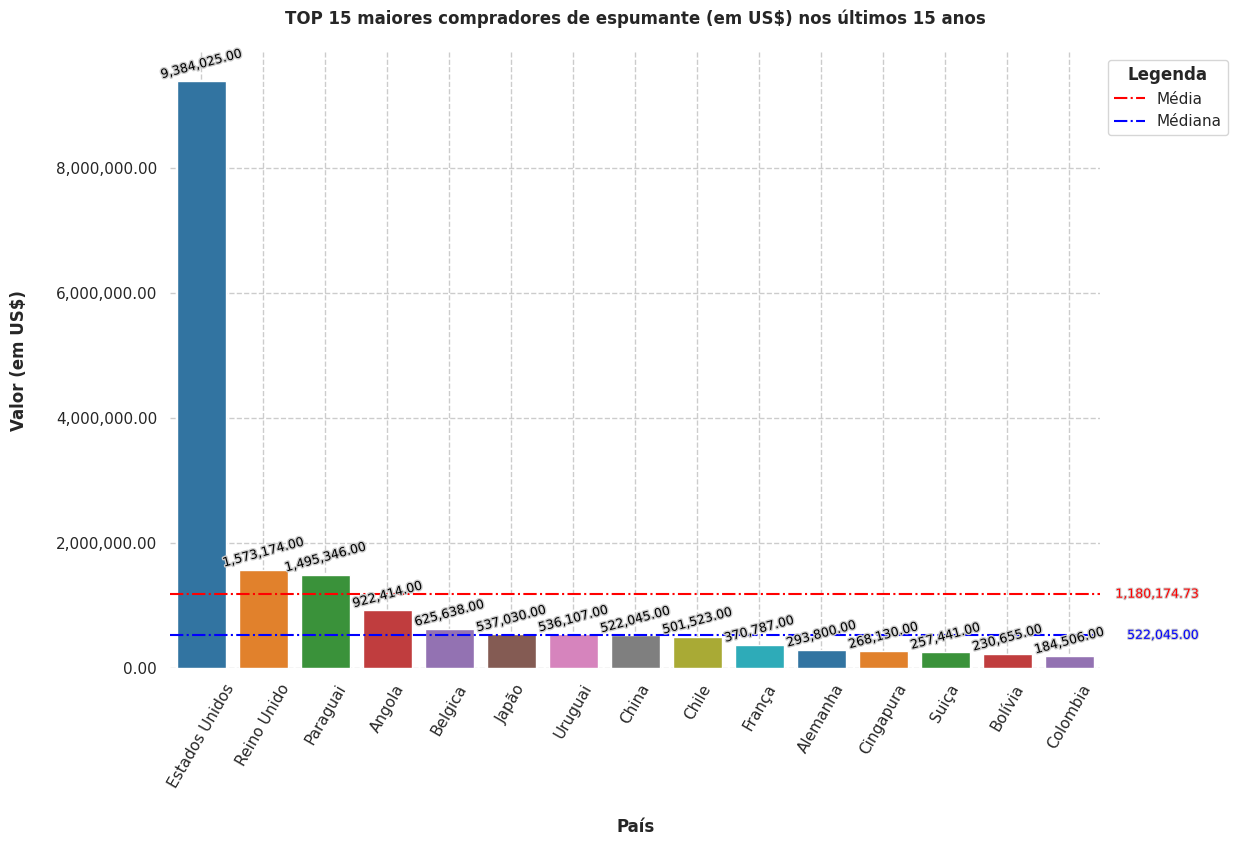

In [ ]:
plot_bar_consolidado(
  df = df_espumante_consolidado,
  col = 'valor',
  title = 'TOP 15 maiores compradores de espumante (em US$) nos últimos 15 anos',
  ylabel = 'Valor (em US$)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

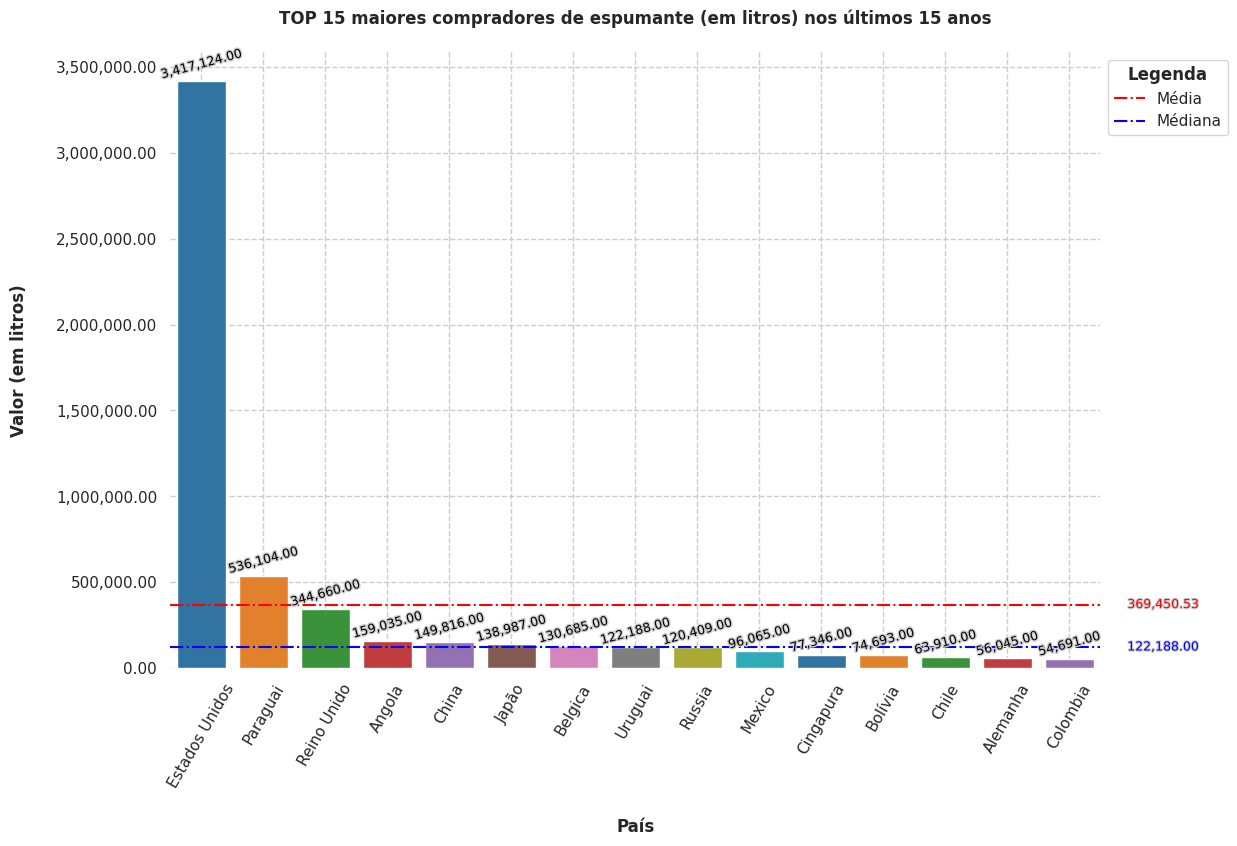

In [ ]:
plot_bar_consolidado(
  df = df_espumante_consolidado,
  col = 'quantidade',
  title = 'TOP 15 maiores compradores de espumante (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

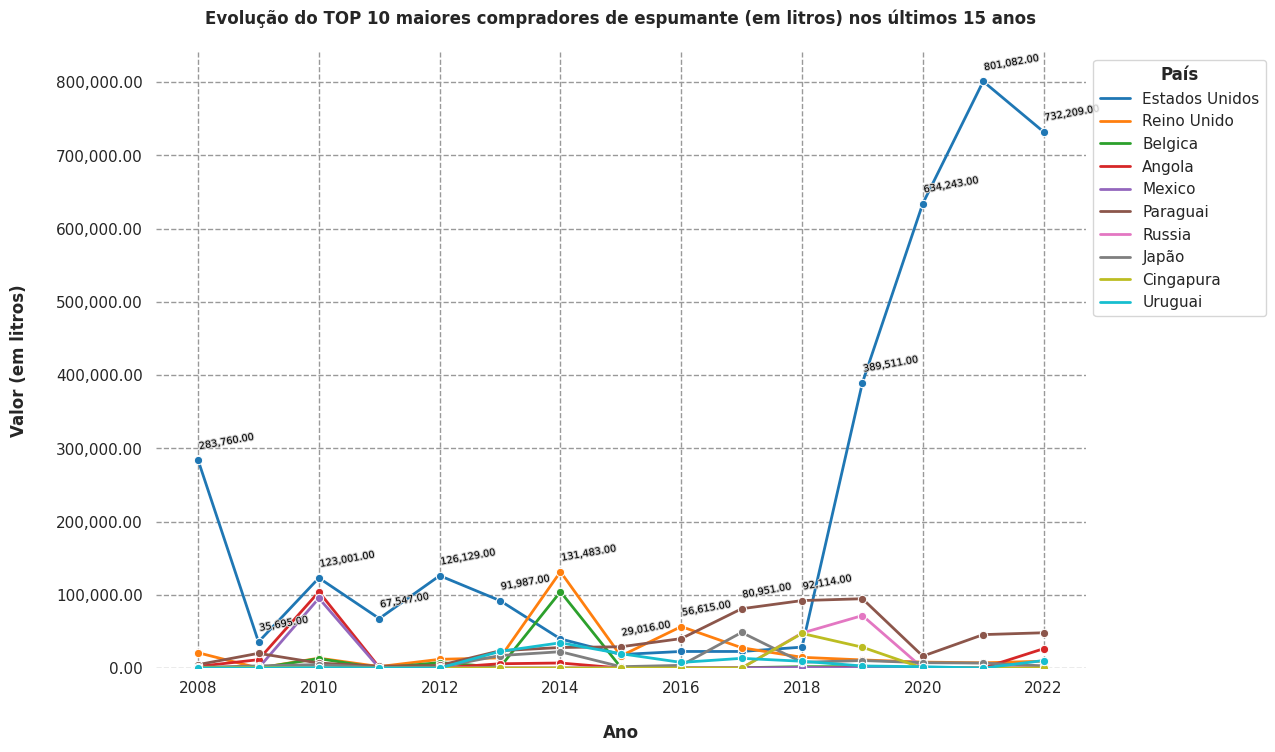

In [ ]:
plot_linha_consolidado(
  df = df_espumante_processado,
  col = 'quantidade',
  title = 'Evolução do TOP 10 maiores compradores de espumante (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  xlabel = 'Ano',
  legend = True,
  escala_y = 15_000,
  top = 10
)

# Analisando as exportações (base de sucos)

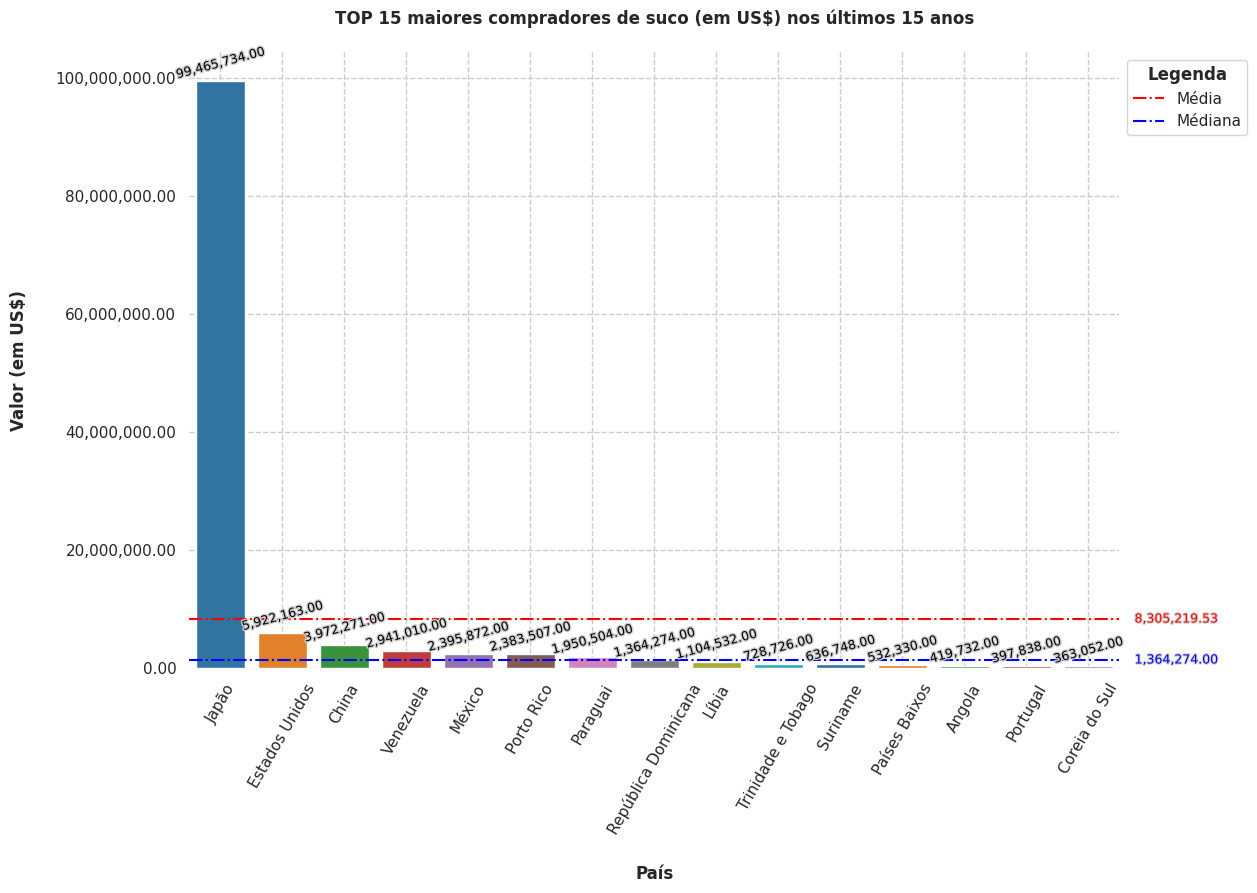

In [ ]:
plot_bar_consolidado(
  df = df_suco_consolidado,
  col = 'valor',
  title = 'TOP 15 maiores compradores de suco (em US$) nos últimos 15 anos',
  ylabel = 'Valor (em US$)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

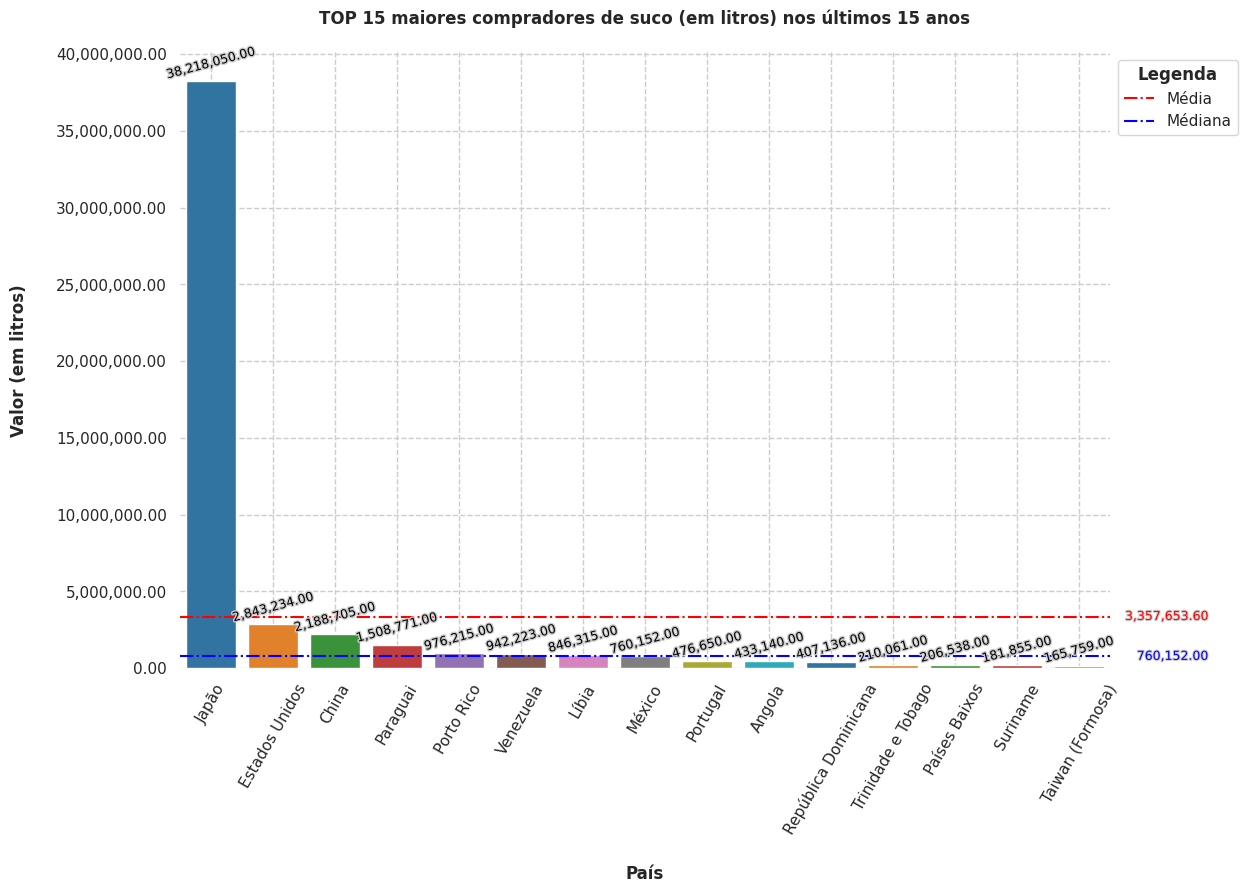

In [ ]:
plot_bar_consolidado(
  df = df_suco_consolidado,
  col = 'quantidade',
  title = 'TOP 15 maiores compradores de suco (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

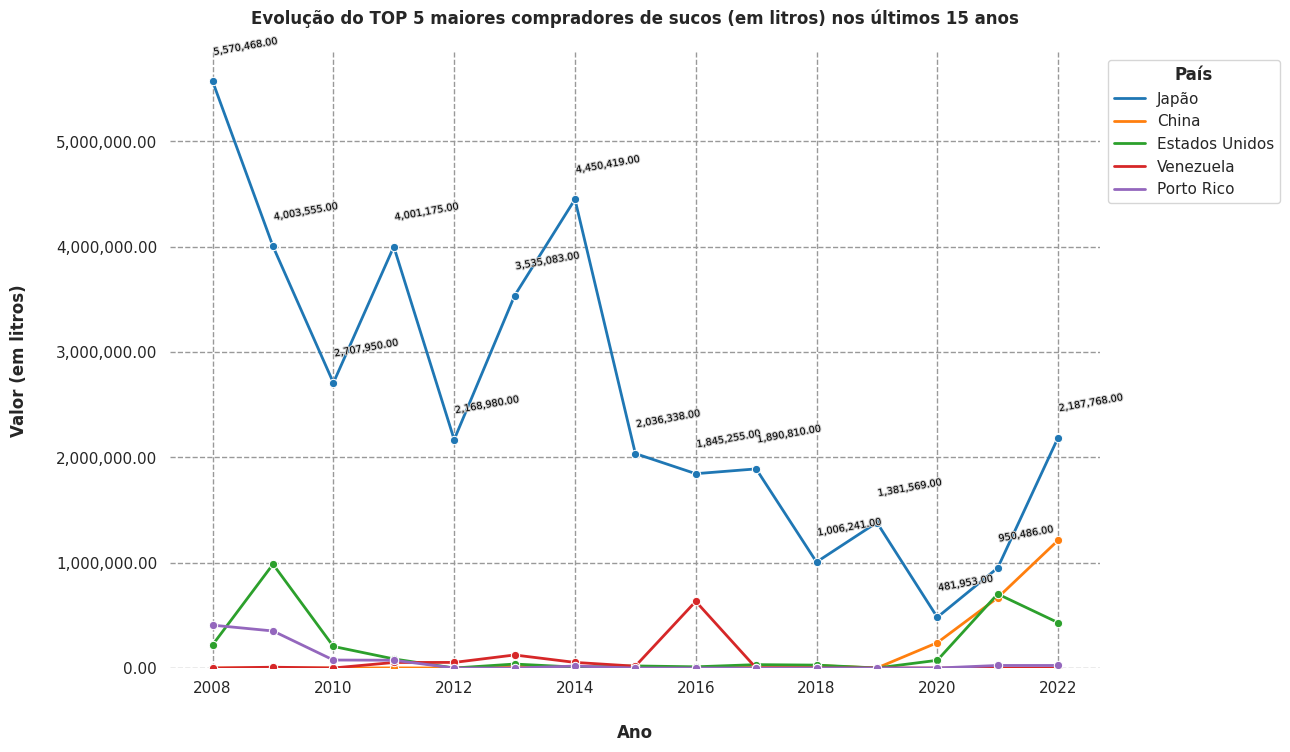

In [ ]:
plot_linha_consolidado(
  df = df_suco_processado,
  col = 'quantidade',
  title = 'Evolução do TOP 5 maiores compradores de sucos (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  xlabel = 'Ano',
  legend = True
)

# Analisando as exportações (base de uvas)

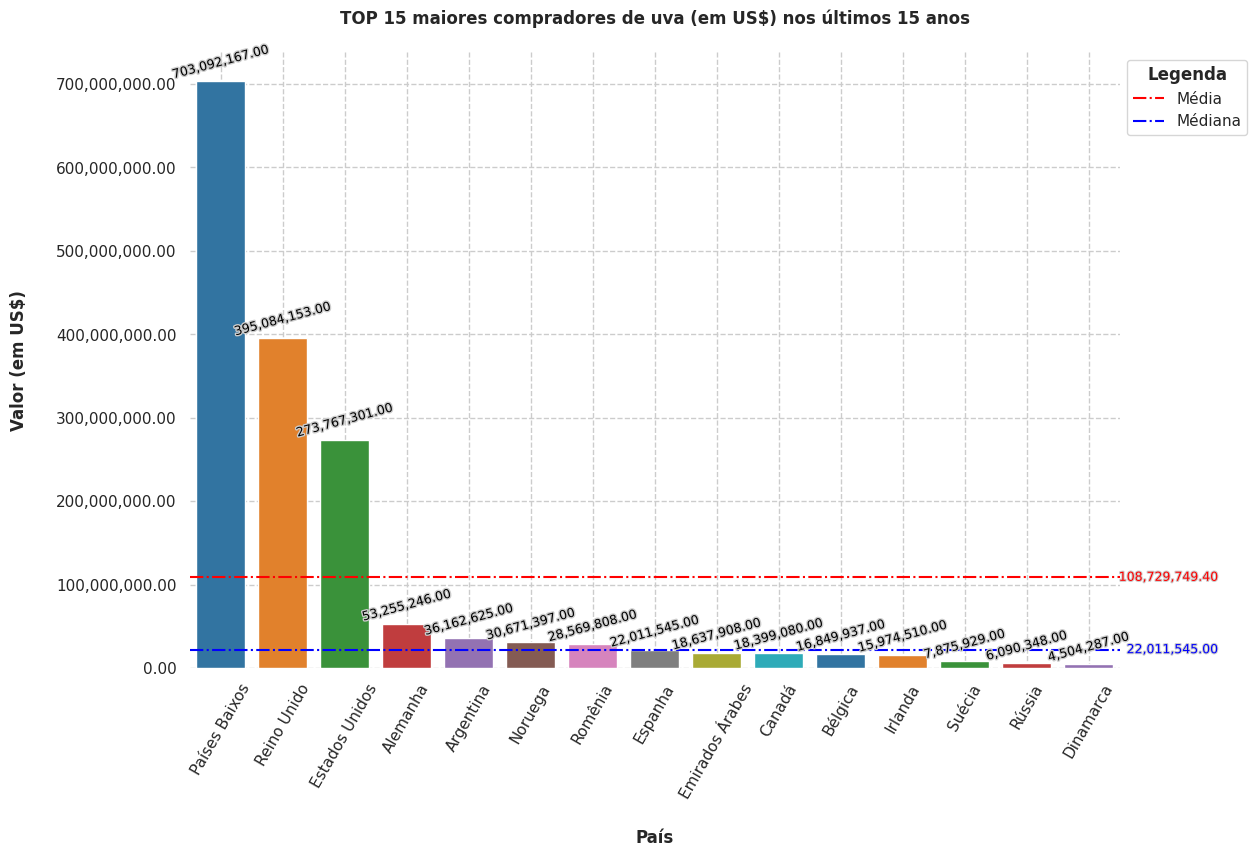

In [ ]:
plot_bar_consolidado(
  df = df_uva_consolidado,
  col = 'valor',
  title = 'TOP 15 maiores compradores de uva (em US$) nos últimos 15 anos',
  ylabel = 'Valor (em US$)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

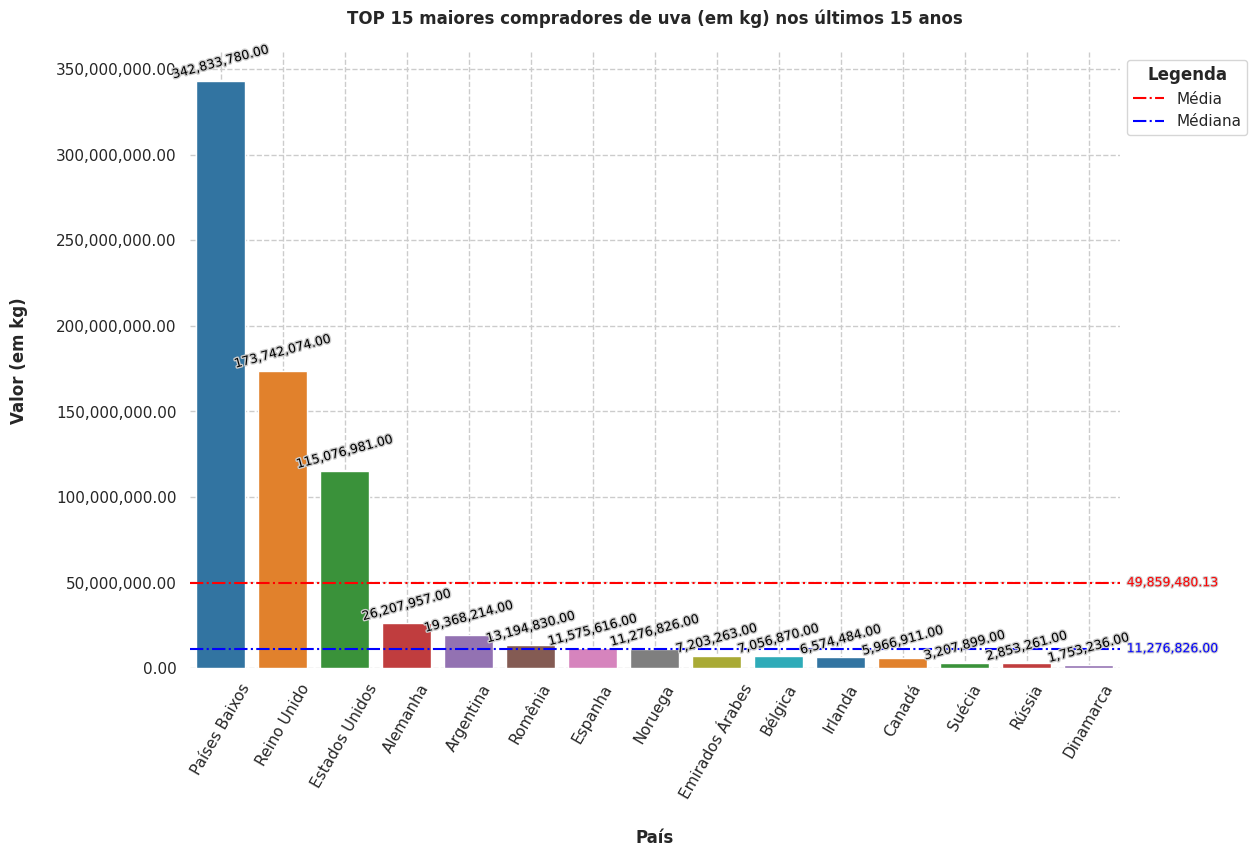

In [ ]:
plot_bar_consolidado(
  df = df_uva_consolidado,
  col = 'quantidade',
  title = 'TOP 15 maiores compradores de uva (em kg) nos últimos 15 anos',
  ylabel = 'Valor (em kg)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

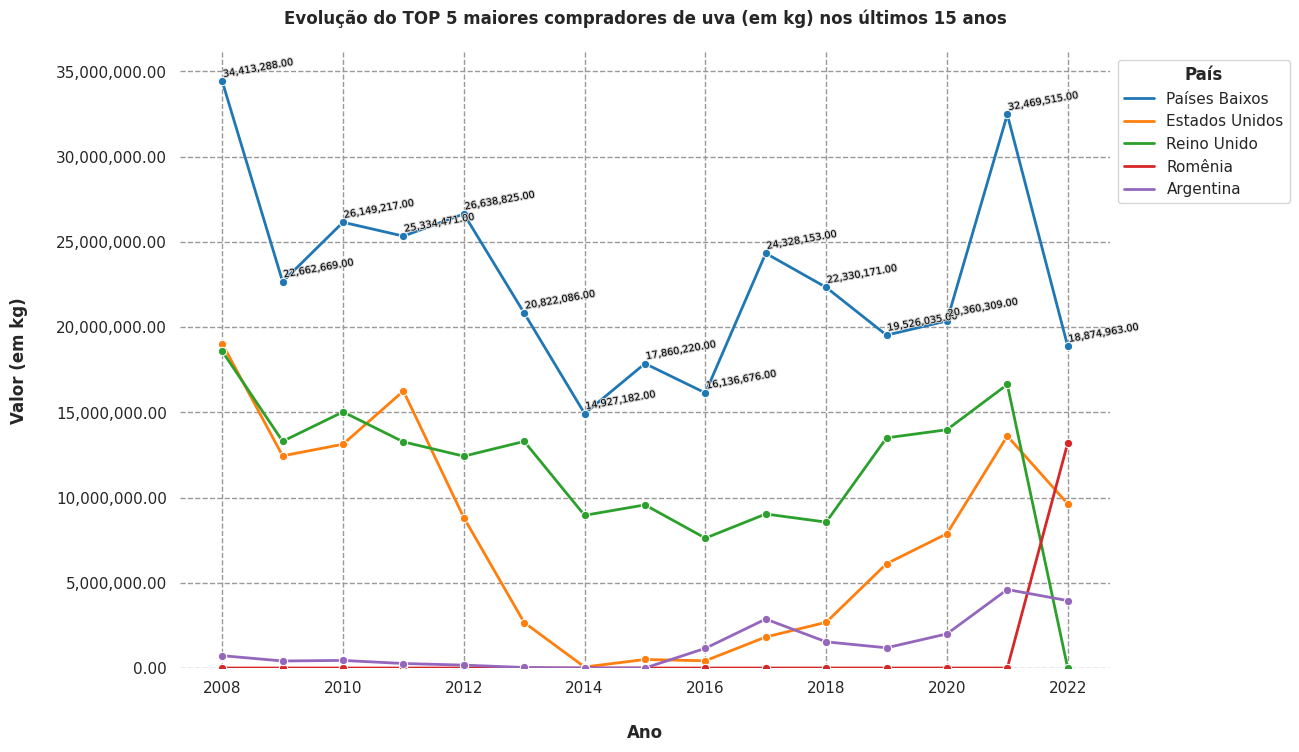

In [ ]:
plot_linha_consolidado(
  df = df_uva_processado,
  col = 'quantidade',
  title = 'Evolução do TOP 5 maiores compradores de uva (em kg) nos últimos 15 anos',
  ylabel = 'Valor (em kg)',
  xlabel = 'Ano',
  legend = True
)

# Analisando as exportações (base de vinhos)

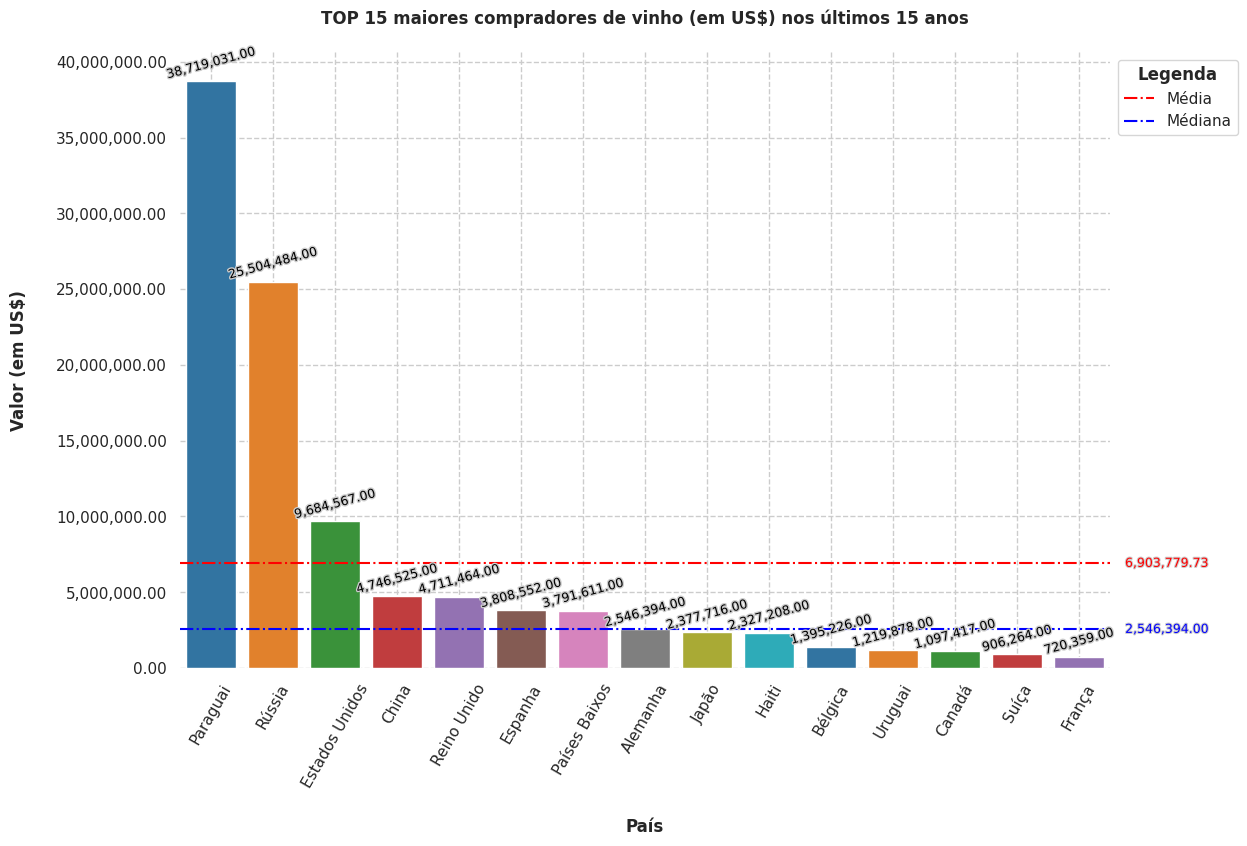

In [ ]:
plot_bar_consolidado(
  df = df_vinho_consolidado,
  col = 'valor',
  title = 'TOP 15 maiores compradores de vinho (em US$) nos últimos 15 anos',
  ylabel = 'Valor (em US$)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

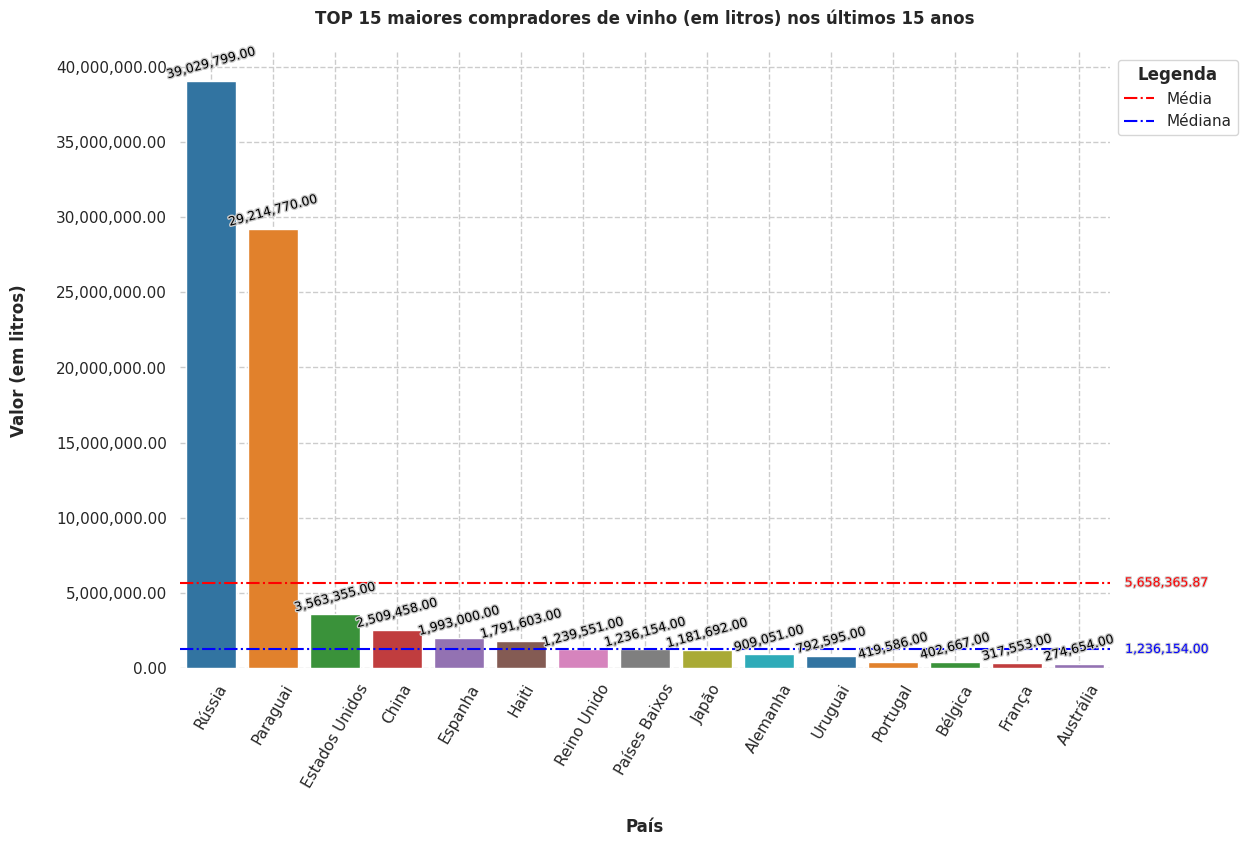

In [ ]:
plot_bar_consolidado(
  df = df_vinho_consolidado,
  col = 'quantidade',
  title = 'TOP 15 maiores compradores de vinho (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  legend = True,
  output_mean_line = True,
  output_median_line = True
)

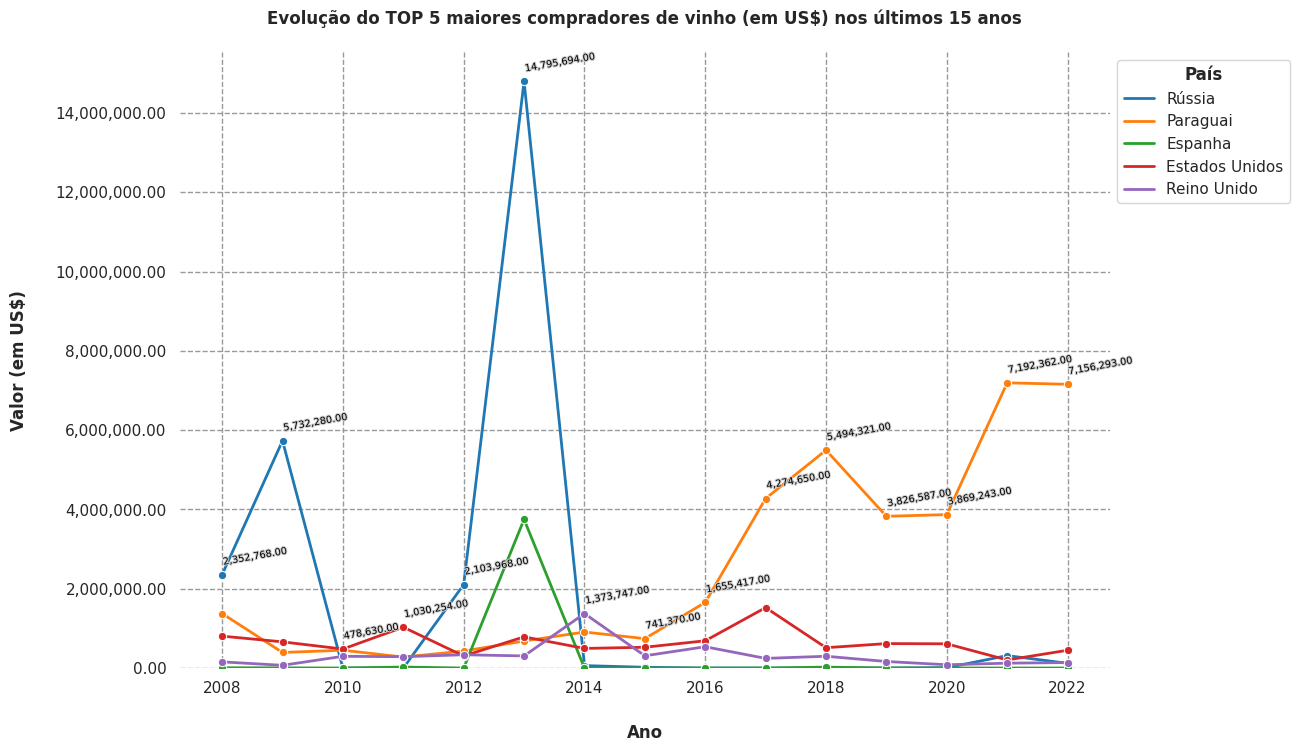

In [ ]:
plot_linha_consolidado(
  df = df_vinho_processado,
  col = 'valor',
  title = 'Evolução do TOP 5 maiores compradores de vinho (em US$) nos últimos 15 anos',
  ylabel = 'Valor (em US$)',
  xlabel = 'Ano',
  legend = True
)

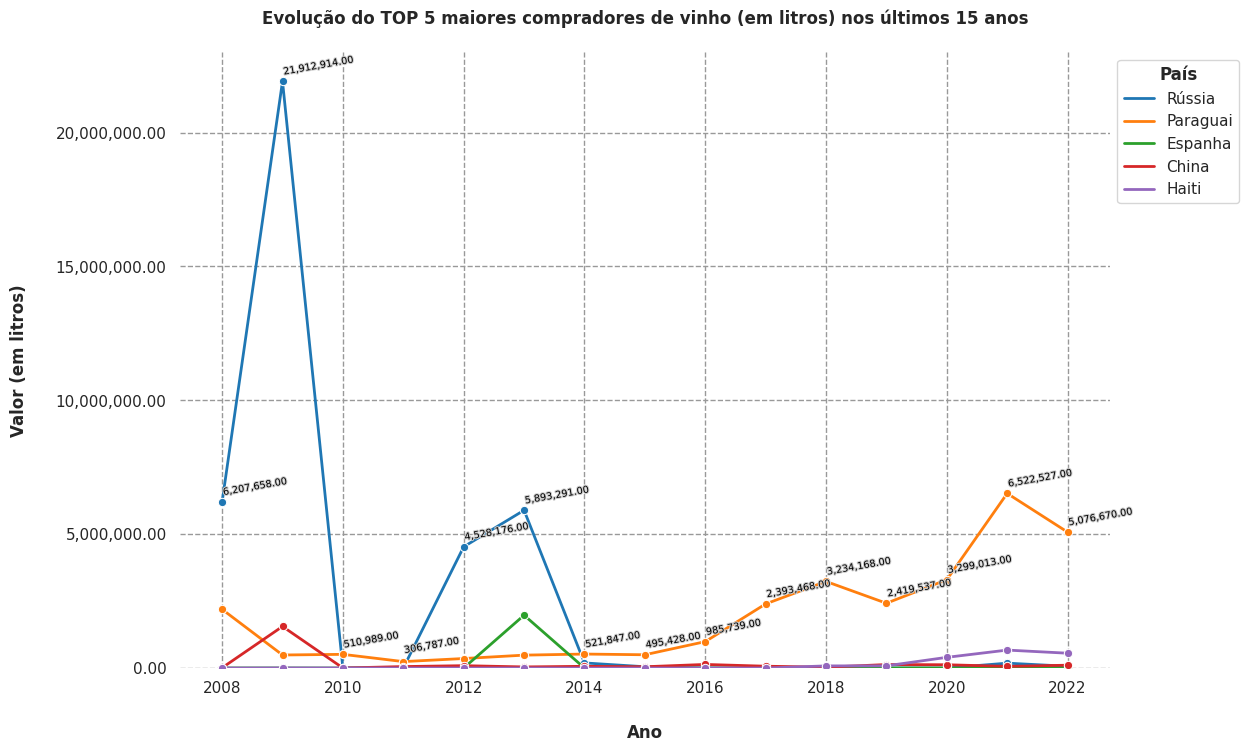

In [ ]:
plot_linha_consolidado(
  df = df_vinho_processado,
  col = 'quantidade',
  title = 'Evolução do TOP 5 maiores compradores de vinho (em litros) nos últimos 15 anos',
  ylabel = 'Valor (em litros)',
  xlabel = 'Ano',
  legend = True
)

## Análise aprofundada das exportações de vinho

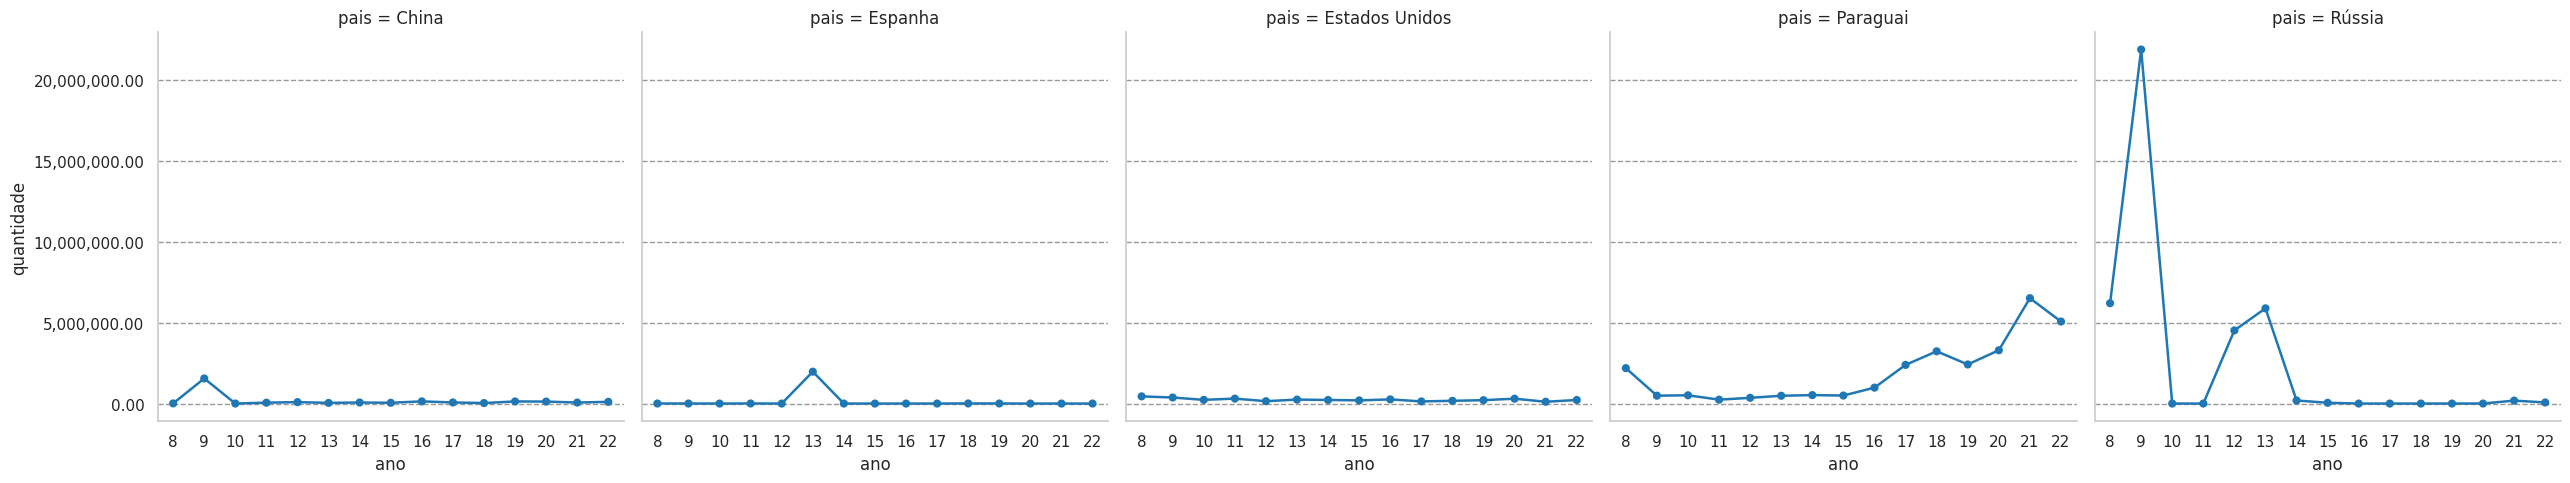

In [ ]:
maiores_exportadores_vinho = df_vinho_processado.groupby(by='pais').sum().drop('ano', axis=1).sort_values(by='quantidade', ascending=False).head(5).reset_index()
paises = maiores_exportadores_vinho.pais.unique()[:5]
maiores_exportadores_vinho_top5 = df_vinho_processado.query('pais in @paises')
maiores_exportadores_vinho_top5['ano'] = maiores_exportadores_vinho_top5['ano'].astype(str).str[2:].astype(int)

g = sns.catplot(
    data = maiores_exportadores_vinho_top5,
    x = 'ano',
    y = 'quantidade',
    col = 'pais',
    kind = 'point',
)

for ax in g.axes.flat:
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

No gráfico a seguir, podemos acompanhar o declínio das exportações para a Rússia e a sua tendência de queda, além do crescimento das exportações para o Paraguai. Isso demonstra que existem diversas oportunidades que podem ser firmadas entre ambos os países (Brasil X Paraguai) para consolidar cada vez mais a parceria e as exportações de nossos produtos. O gráfico considera exclusivamente a quantidade exportada.

<Figure size 1200x800 with 0 Axes>

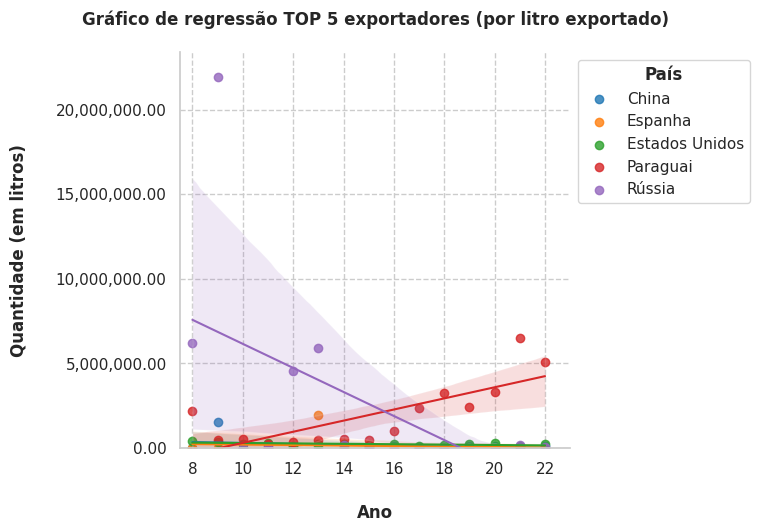

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.lmplot(x="ano", y="quantidade", data=maiores_exportadores_vinho_top5, hue='pais', legend=False)

plt.title('Gráfico de regressão TOP 5 exportadores (por litro exportado)', fontdict = fontconfig, pad = padding)
plt.xlabel('Ano', fontdict = fontconfig, labelpad = padding)
plt.ylabel('Quantidade (em litros)', fontdict = fontconfig, labelpad = padding)

plt.grid(color='#ccc', linestyle='dashed', linewidth=1)
plt.legend(title = 'País', loc = 'upper left', bbox_to_anchor = (1, 1), title_fontproperties = fontconfig)
plt.xlim(7.5, 23)
plt.gca().set_ylim(bottom=0)

for ax in g.axes.flat:
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

O declínio e a tendência de baixa no valor (US\$) exportado para a Rússia também pode ser observado (fazendo paralelos com a quantidade exportada). Consequentemente, o crescimento das exportações para o Paraguai também estão demonstrados em valores (US\$).

<Figure size 1200x800 with 0 Axes>

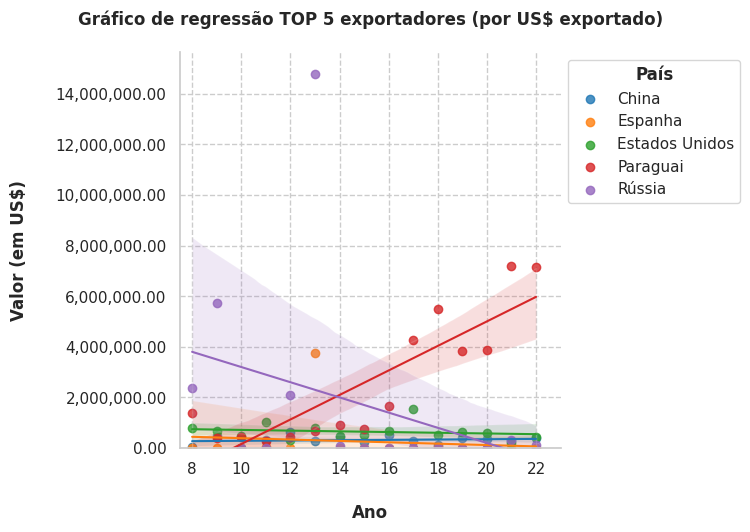

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.lmplot(x="ano", y="valor", data=maiores_exportadores_vinho_top5, hue='pais', legend=False)

plt.title('Gráfico de regressão TOP 5 exportadores (por US$ exportado)', fontdict = fontconfig, pad = padding)
plt.xlabel('Ano', fontdict = fontconfig, labelpad = padding)
plt.ylabel('Valor (em US$)', fontdict = fontconfig, labelpad = padding)

plt.grid(color='#ccc', linestyle='dashed', linewidth=1)
plt.legend(title = 'País', loc = 'upper left', bbox_to_anchor = (1, 1), title_fontproperties = fontconfig)
plt.xlim(7.5, 23)
plt.gca().set_ylim(bottom=0)

# format the labels with f-strings
for ax in g.axes.flat:
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

# Consolidado anual das exportações de vinho

In [ ]:
df_vinho_bkp = df_vinho_processado.copy()
df_vinho_bkp.head()

,pais,quantidade,valor,ano,origem
0,Afeganistão,0.0,0.0,2008,Brasil
1,Afeganistão,0.0,0.0,2009,Brasil
2,Afeganistão,0.0,0.0,2010,Brasil
3,Afeganistão,0.0,0.0,2011,Brasil
4,Afeganistão,0.0,0.0,2012,Brasil


In [ ]:
consolidado_anual = df_vinho_bkp.groupby('ano', as_index=True).agg(['mean', 'sum'])
consolidado_anual

quantidade                      valor            
               mean         sum           mean         sum
ano                                                       
2008   80830.648438  10346323.0   55610.156250   7118100.0
2009  199329.671875  25514198.0   69851.468750   8940988.0
2010   10004.484375   1280574.0   20275.804688   2595303.0
2011    9490.890625   1214834.0   28243.125000   3615120.0
2012   45120.125000   5775376.0   43135.101562   5521293.0
2013   71477.023438   9149059.0  177694.101562  22744845.0
2014   18156.476562   2324029.0   58381.210938   7472795.0
2015    9363.117188   1198479.0   21634.062500   2769160.0
2016   13957.414062   1786549.0   34646.125000   4434704.0
2017   22574.781250   2889572.0   55746.929688   7135607.0
2018   30126.265625   3856162.0   58484.867188   7486063.0
2019   24631.820312   3152873.0   46365.828125   5934826.0
2020   34450.914062   4409717.0   47486.625000   6078288.0
2021   62958.625000   8058704.0   76968.296875   9851942.0
2022   54890.492188   7025983.0   85510.015625  10945282.0

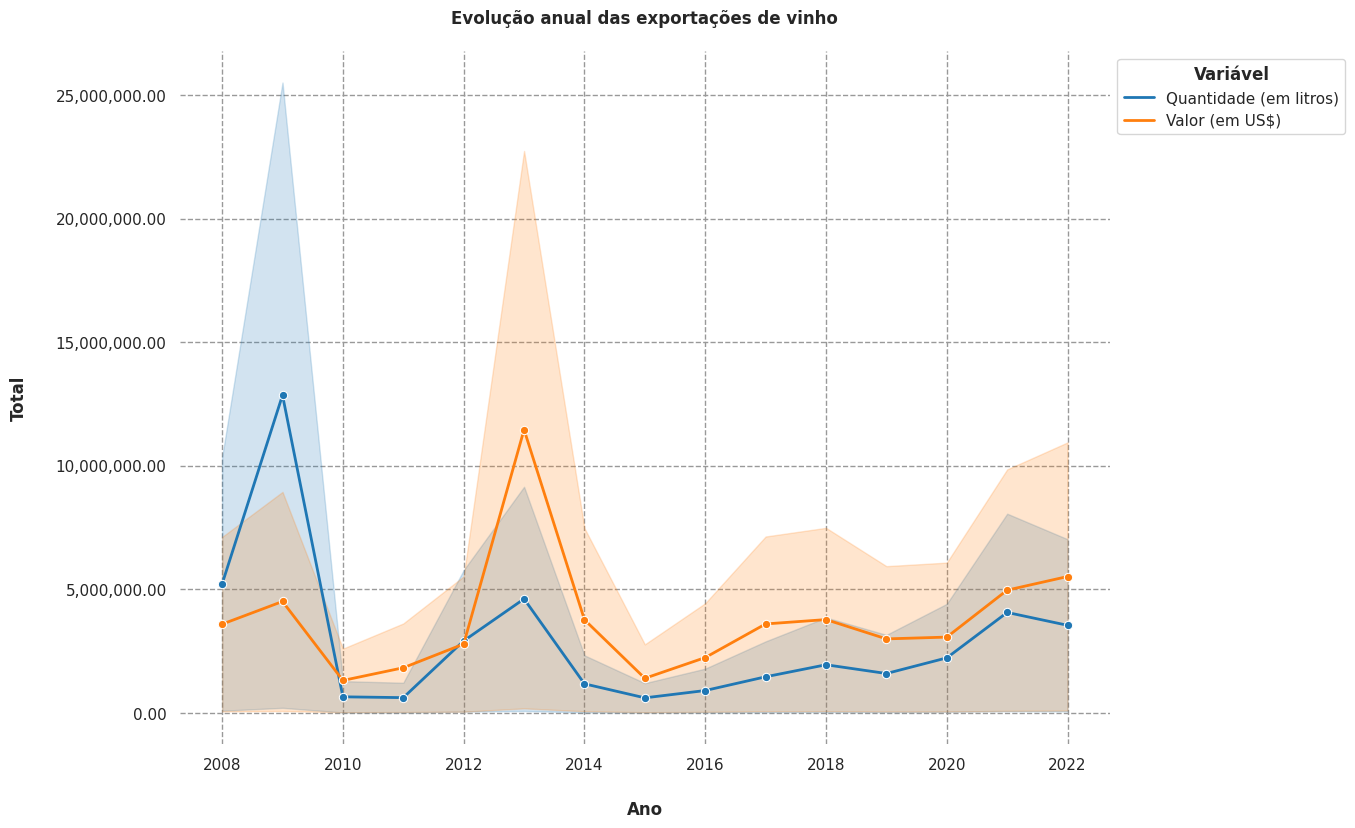

In [ ]:
plt.figure(figsize=(12, 9))

ax = sns.lineplot(data = consolidado_anual, linewidth=2, marker='o', dashes=False)
ax.set_xlabel('Ano', fontdict = fontconfig, labelpad = padding);
ax.set_ylabel('Total', fontdict = fontconfig, labelpad = padding);
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

leg_linha_quantidade = mlines.Line2D([], [], color='#1F77B4', label='Quantidade (em litros)', linewidth=2)
leg_linha_valor = mlines.Line2D([], [], color='#FF7F0E', label='Valor (em US$)', linewidth=2)
plt.legend(
    title='Variável',
    handles=[leg_linha_quantidade, leg_linha_valor],
    loc = 'upper left',
    bbox_to_anchor = (1, 1),
    title_fontproperties = fontconfig
)

plt.title('Evolução anual das exportações de vinho', fontdict = fontconfig, pad = padding)
plt.box(False)
plt.grid(True)
plt.show()

In [ ]:
consolidado_anual_somatoria = df_vinho_bkp.groupby('ano', as_index=False).sum()
consolidado_anual_somatoria

,ano,quantidade,valor
0,2008,10346323.0,7118100.0
1,2009,25514198.0,8940988.0
2,2010,1280574.0,2595303.0
3,2011,1214834.0,3615120.0
4,2012,5775376.0,5521293.0
5,2013,9149059.0,22744845.0
6,2014,2324029.0,7472795.0
7,2015,1198479.0,2769160.0
8,2016,1786549.0,4434704.0
9,2017,2889572.0,7135607.0


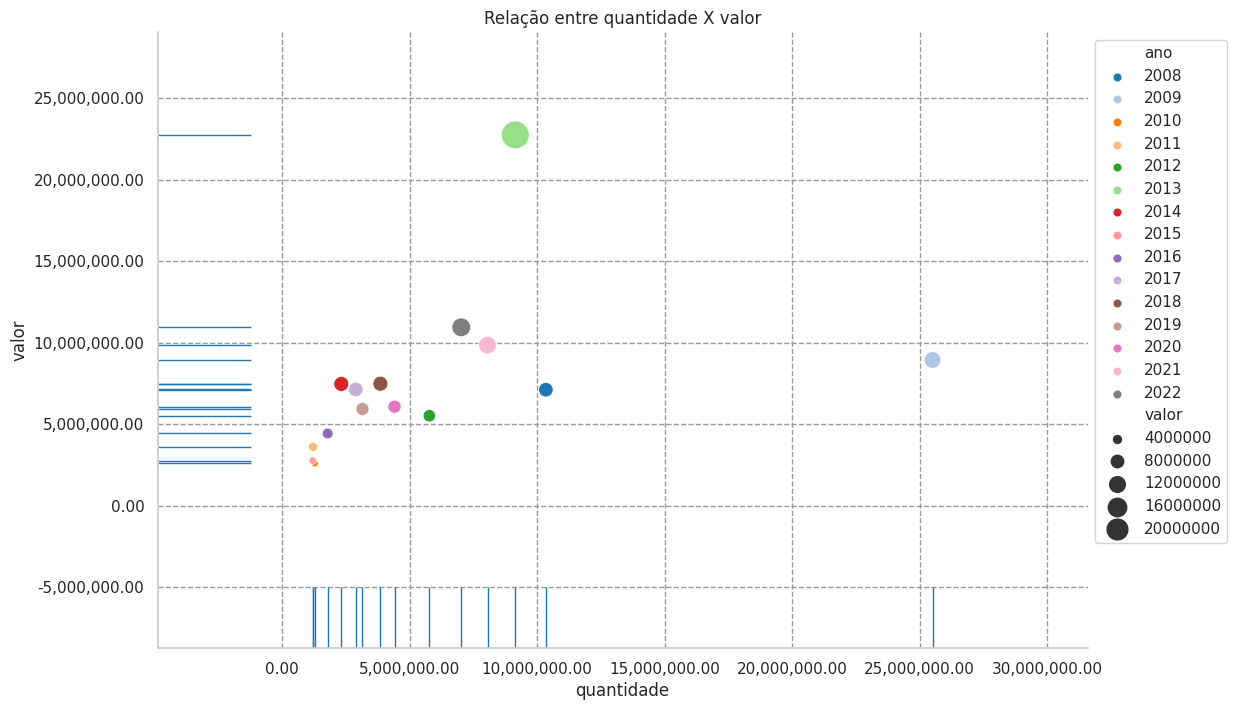

In [ ]:
paleta = sns.color_palette("icefire", as_cmap=True)
# sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(data=consolidado_anual_somatoria, x='quantidade', y='valor', hue='ano', size='valor', sizes=(25, 400), palette='tab20')
sns.rugplot(data=consolidado_anual_somatoria, x="quantidade", y="valor",  height=.1)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Relação entre quantidade X valor')
sns.despine()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
plt.show()


## Evolução dos maiores exportadores nos últimos 5 anos

In [ ]:
maiores_exportadores = df_vinho_processado.query('ano >= 2018').groupby(by=['ano', 'pais']).sum().sort_values(by=['ano', 'valor'], ascending=True).reset_index()

In [ ]:
df_maiores_exportadores_2018 = maiores_exportadores.query('ano == 2018').tail(5)
df_maiores_exportadores_2019 = maiores_exportadores.query('ano == 2019').tail(5)
df_maiores_exportadores_2020 = maiores_exportadores.query('ano == 2020').tail(5)
df_maiores_exportadores_2021 = maiores_exportadores.query('ano == 2021').tail(5)
df_maiores_exportadores_2022 = maiores_exportadores.query('ano == 2022').tail(5)
df_maiores_exportadores_final = pd.concat([
    df_maiores_exportadores_2018,
    df_maiores_exportadores_2019,
    df_maiores_exportadores_2020,
    df_maiores_exportadores_2021,
    df_maiores_exportadores_2022
]).reset_index()

df_maiores_exportadores_final

,index,ano,pais,quantidade,valor
0,123,2018,China,30835.0,126336.0
1,124,2018,Haiti,79500.0,144425.0
2,125,2018,Reino Unido,67708.0,296827.0
3,126,2018,Estados Unidos,169109.0,512519.0
4,127,2018,Paraguai,3234168.0,5494321.0
5,251,2019,Países Baixos,44882.0,148031.0
6,252,2019,Reino Unido,34295.0,164592.0
7,253,2019,China,129852.0,376828.0
8,254,2019,Estados Unidos,209765.0,616274.0
9,255,2019,Paraguai,2419537.0,3826587.0


In [ ]:
# tabela de países top5 exportadores nos últimos 5 anos
df_maiores_exportadores_final.groupby(['ano', 'pais']).sum().sort_values(by=['ano', 'pais']).drop('index', axis=1)

quantidade      valor
ano  pais                                 
2018 China              30835.0   126336.0
     Estados Unidos    169109.0   512519.0
     Haiti              79500.0   144425.0
     Paraguai         3234168.0  5494321.0
     Reino Unido        67708.0   296827.0
2019 China             129852.0   376828.0
     Estados Unidos    209765.0   616274.0
     Paraguai         2419537.0  3826587.0
     Países Baixos      44882.0   148031.0
     Reino Unido        34295.0   164592.0
2020 China             122253.0   363000.0
     Estados Unidos    300178.0   610793.0
     Haiti             399128.0   471152.0
     Japão              36442.0    92674.0
     Paraguai         3299013.0  3869243.0
2021 China              61884.0   264116.0
     Estados Unidos    111085.0   203554.0
     Haiti             670379.0   831181.0
     Paraguai         6522527.0  7192362.0
     Rússia            181931.0   312926.0
2022 China             105395.0   404647.0
     Estados Unidos    220373.0   447893.0
     Haiti             553503.0   741014.0
     Paraguai         5076670.0  7156293.0
     Uruguai           637117.0   997367.0

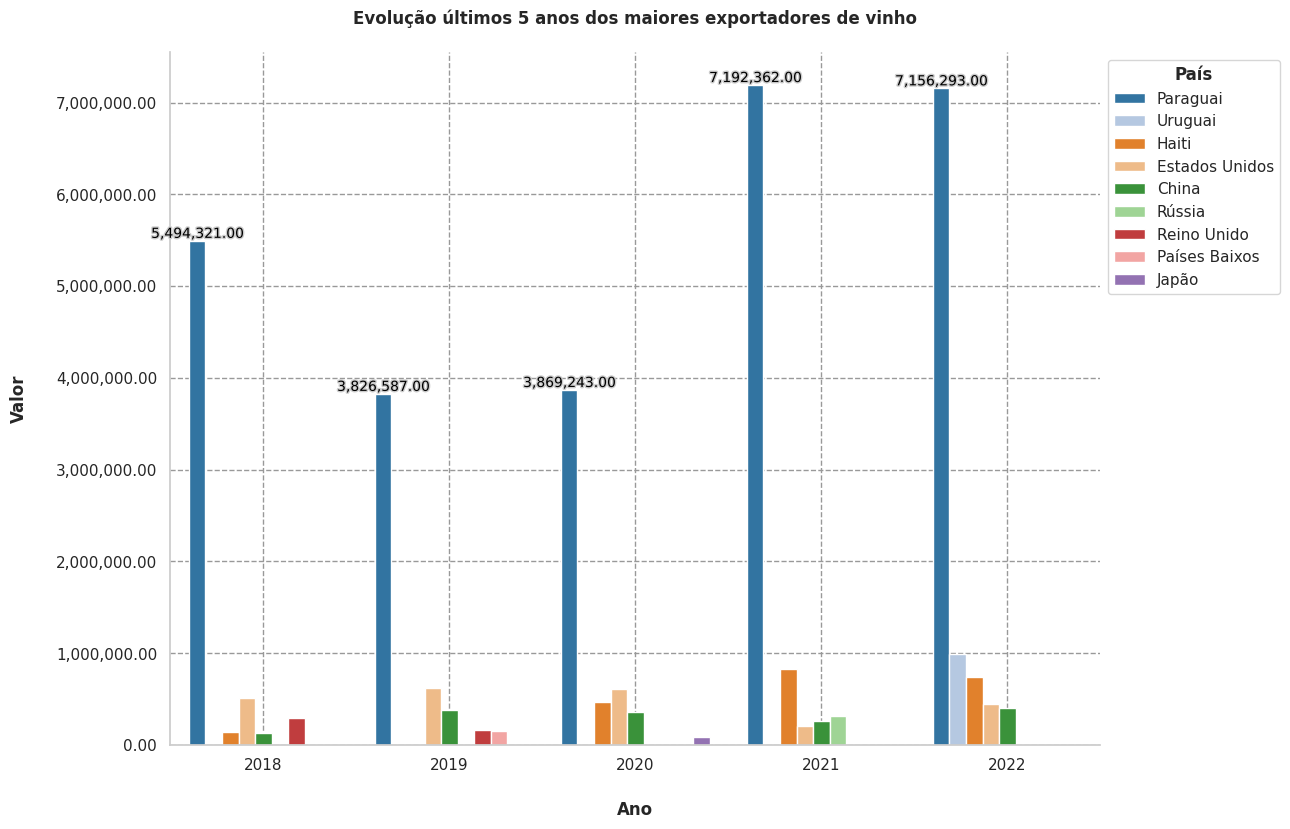

In [ ]:
plt.figure(figsize=(12, 9))

ax = sns.barplot(data=df_maiores_exportadores_final.sort_values(by='valor', ascending=False), x='ano', y='valor', hue='pais', palette='tab20')
ax.set_xlabel('Ano', fontdict = fontconfig, labelpad = padding);
ax.set_ylabel('Valor', fontdict = fontconfig, labelpad = padding);
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.bar_label(ax.containers[0], fontsize=10, fmt='{:,.2f}', color='#000', path_effects=[pe.withStroke(linewidth=2, foreground="#ccc")])

plt.title('Evolução últimos 5 anos dos maiores exportadores de vinho', fontdict = fontconfig, pad = padding)
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8, title_fontproperties = fontconfig)

sns.despine()
plt.grid(True)
plt.show()

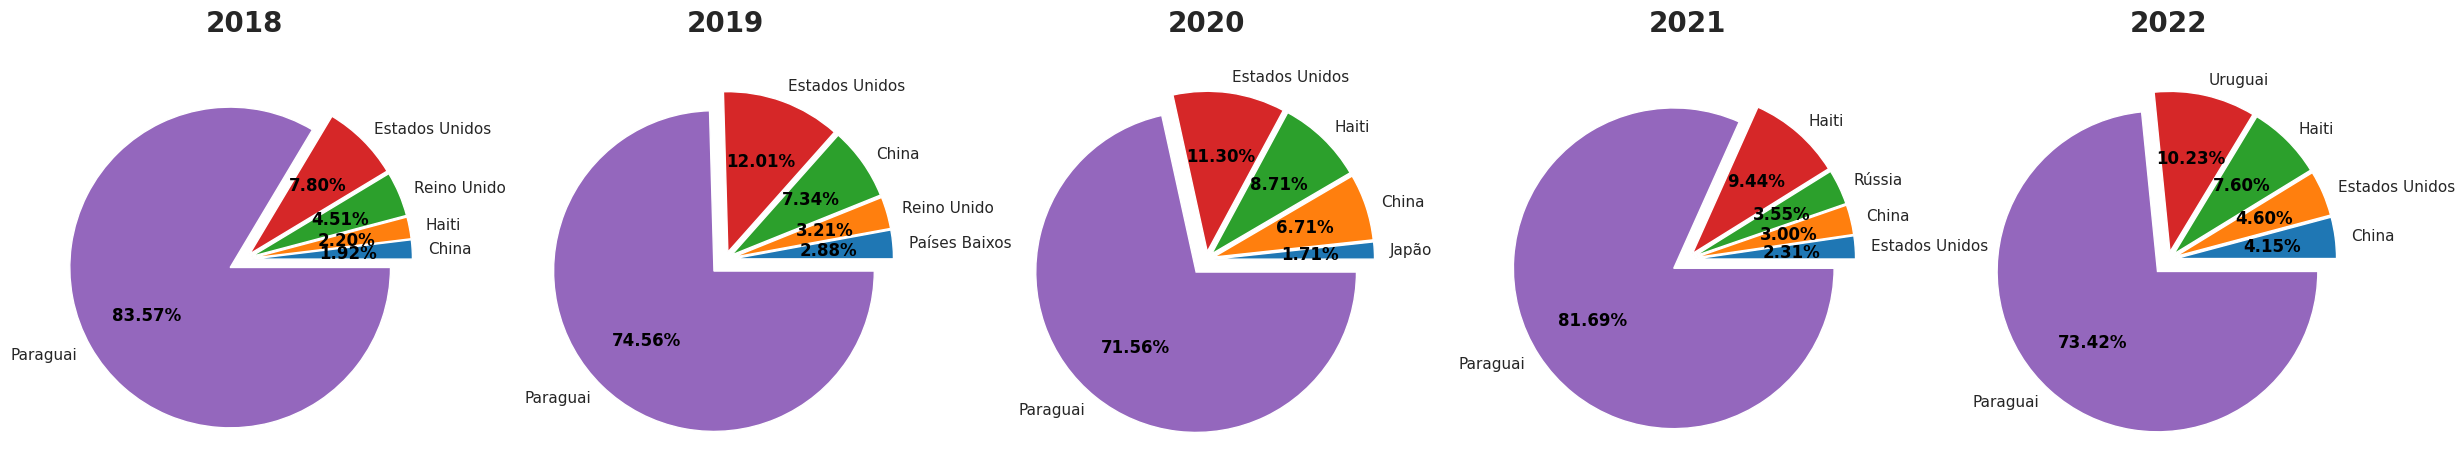

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

def plot_pie_maiores_exportadores(index: int, df: pd.DataFrame, titulo: str):
  plt.subplot(1, 5, index)
  size = df['valor']
  labels = df['pais']

  plt.title(titulo, fontsize = 20, fontdict = fontconfig, pad = padding)
  _, _, autotexts = plt.pie(size, labels=labels, autopct='%.2f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.1])
  for ins in autotexts:
      ins.set_color('#000')
      ins.set_weight('bold')

plot_pie_maiores_exportadores(1, df_maiores_exportadores_2018, '2018')
plot_pie_maiores_exportadores(2, df_maiores_exportadores_2019, '2019')
plot_pie_maiores_exportadores(3, df_maiores_exportadores_2020, '2020')
plot_pie_maiores_exportadores(4, df_maiores_exportadores_2021, '2021')
plot_pie_maiores_exportadores(5, df_maiores_exportadores_2022, '2022')